This is a notebook that looks at sequential learning with some toy cases  
Author: Andrew Holmgren  
BSD3 license

# Imports

In [13]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt

In [ ]:
normal = lambda x, u, s: 1 / np.sqrt(2 * np.pi * s**2) * np.exp(-(x - u) / (2 * s**2))

# Simple model with linear parameters

## The model

(3.7) in Bishop, "Pattern Recognition and Machine Learning"  
$$
t = y(\mathbf{x}, \mathbf{w}) + \epsilon
$$
giving
$$
p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \beta) = \pi_{n=1}^N \mathcal{N}(t_N\mid \mathbf{w}^T \phi(\mathbf{x}_n), \beta^{-1})
$$
where $\phi$ are modeled basis functions such that
$$
y(\mathbf{x}, \mathbf{w})=\sum_{j=0}^{M-1}w_j \phi_j(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x})
$$

In [4]:
y = lambda x, w: w[0] + w[1] * x

In [5]:
w_true = [-0.3, 0.5]
y(0, w_true)

-0.3

In [11]:
beta = (1 / .2)**2
alpha = 2.

## Generate the data

In [17]:
x_vals = np.random.rand(20) * 2 - 1
print(x_vals)

[ 0.54745344  0.93100045  0.63493354 -0.69220357 -0.99392913 -0.52278428
 -0.99281482  0.87394508  0.51413821 -0.85681813 -0.16657292 -0.02506078
  0.38854114 -0.83446589  0.4818891   0.12262944  0.20868325  0.0241436
 -0.54247351  0.09946953]


In [18]:
t = y(x_vals, w_true) + np.random.normal(loc=0, scale=np.sqrt(1 / beta), size=x_vals.size)

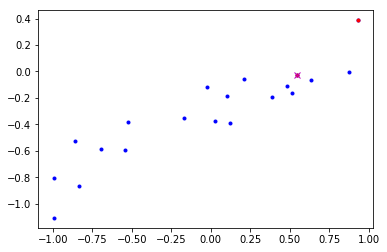

In [28]:
plt.figure()
plt.plot(x_vals, t, '.b', x_vals[:2], t[:2], '.r', x_vals[:1], t[:1], 'xm')

Set up the posterior

In [29]:
v_m0 = np.array([0., 0.])
m_S0 = 1/alpha*np.identity(2)